<a href="https://colab.research.google.com/github/Spurthi2005/23CSBTB29/blob/main/AIML_ASS_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("prostate.csv")
df.head()

,ID,CAPSULE,AGE,RACE,DPROS,DCAPS,PSA,VOL,GLEASON
0,1,0,65,1,2,1,1.4,0.0,6
1,2,0,72,1,3,2,6.7,0.0,7
2,3,0,70,1,1,2,4.9,0.0,6
3,4,0,76,2,2,1,51.2,20.0,7
4,5,0,69,1,1,1,12.3,55.9,6


In [3]:
from sklearn.preprocessing import StandardScaler
Target = 'GLEASON'
scaler = StandardScaler()

scaler.fit(df.drop(Target, axis=1))
scaled_features = scaler.transform(df.drop(Target,
                                           axis=1))

df_feat = pd.DataFrame(scaled_features,
                       columns=df.columns[:-1])
df_feat.head()

,ID,CAPSULE,AGE,RACE,DPROS,DCAPS,PSA,VOL
0,-1.727499,-0.82098,-0.159466,-0.281620,-0.271381,-0.347770,-0.701440,-0.862988
1,-1.718383,-0.82098,0.914405,-0.281620,0.729830,2.875464,-0.436059,-0.862988
2,-1.709267,-0.82098,0.607585,-0.281620,-1.272591,2.875464,-0.526188,-0.862988
3,-1.700150,-0.82098,1.528045,2.961273,-0.271381,-0.347770,1.792145,0.228509
4,-1.691034,-0.82098,0.454175,-0.281620,-1.272591,-0.347770,-0.155655,2.187746


In [4]:
from sklearn.metrics import classification_report,\
    confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

X_train, X_test,\
    y_train, y_test = train_test_split(scaled_features,
                                       df[Target],
                                       test_size=0.30)



knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)


print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[ 0  0  1  0  0  0]
 [ 0  7 10  0  1  0]
 [ 0  7 23  9  2  2]
 [ 0  6 12 19  4  1]
 [ 0  0  2  4  0  0]
 [ 0  0  1  3  0  0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           5       0.35      0.39      0.37        18
           6       0.47      0.53      0.50        43
           7       0.54      0.45      0.49        42
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         4

    accuracy                           0.43       114
   macro avg       0.23      0.23      0.23       114
weighted avg       0.43      0.43      0.43       114



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


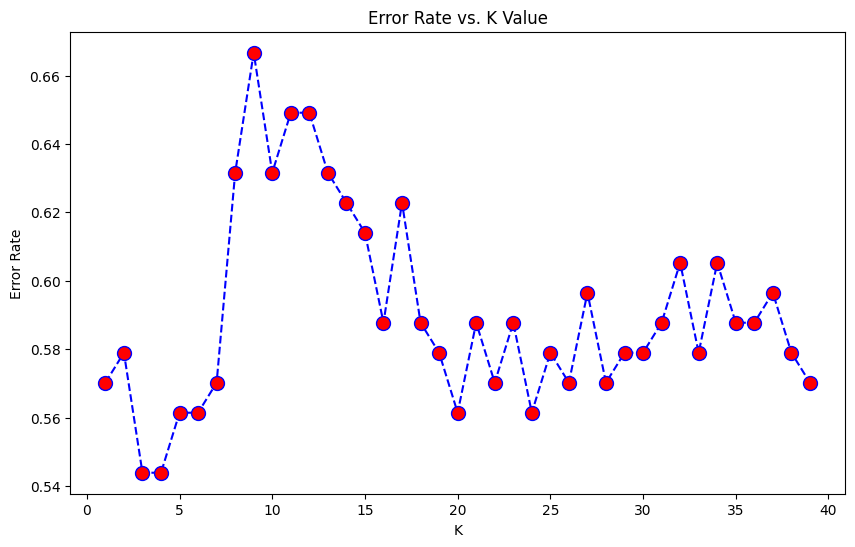

In [5]:
error_rate = []

for i in range(1, 40):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue',
         linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)

plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')
plt.show()

In [6]:
knn = KNeighborsClassifier(n_neighbors = 1)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('WITH K = 1')
print('Confusion Matrix')
print(confusion_matrix(y_test, pred))
print('Classification Report')
print(classification_report(y_test, pred))

WITH K = 1
Confusion Matrix
[[ 0  0  1  0  0  0]
 [ 0  7 10  0  1  0]
 [ 0  7 23  9  2  2]
 [ 0  6 12 19  4  1]
 [ 0  0  2  4  0  0]
 [ 0  0  1  3  0  0]]
Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           5       0.35      0.39      0.37        18
           6       0.47      0.53      0.50        43
           7       0.54      0.45      0.49        42
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         4

    accuracy                           0.43       114
   macro avg       0.23      0.23      0.23       114
weighted avg       0.43      0.43      0.43       114



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [7]:
knn = KNeighborsClassifier(n_neighbors = 10)

knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print('WITH K = 10')
print('Confusion Matrix')
print(confusion_matrix(y_test, pred))
print('Classification Report')
print(classification_report(y_test, pred))

WITH K = 10
Confusion Matrix
[[ 0  0  1  0  0  0]
 [ 0  4 11  3  0  0]
 [ 0  7 20 16  0  0]
 [ 0  4 20 18  0  0]
 [ 0  0  2  4  0  0]
 [ 0  0  0  4  0  0]]
Classification Report
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           5       0.27      0.22      0.24        18
           6       0.37      0.47      0.41        43
           7       0.40      0.43      0.41        42
           8       0.00      0.00      0.00         6
           9       0.00      0.00      0.00         4

    accuracy                           0.37       114
   macro avg       0.17      0.19      0.18       114
weighted avg       0.33      0.37      0.35       114



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
